# Detection of Hate Speech on Telegram


## Problem Statement

Hate speech on social media platforms like Telegram presents a significant challenge, threatening user safety and the platform's reputation. Telegram users send millions of messages daily, making it impossible for human moderators to review all content manually. The sheer volume and speed of content generation necessitate a more efficient solution for detecting and mitigating hate speech.



## Solution

The project aims to develop an AI model for text classification system designed to automatically detect whether the speech is hateful or not and categorize hateful content within user-generated text, such as social media posts, comments, and reviews.The model is trained on a labeled dataset and utilizes multiple natural language processing (NLP) methods to detect and categorize hate speech.



## Steps

## Data Preprocessing

##### Removing Stopwords
##### Lowercasing
##### Stemming and Lemmatization
##### Tokenization
##### Emoji removal
##### Abbreviation treatment
##### Removing URLs

## Tokenization and Embeddings


Tokenizing text into smaller units called tokens, which can be words, subwords, or characters. This step makes the text manageable for analysis and processing.

Tried different Embeddings which are numerical representations of tokens. They convert text into dense vectors that capture semantic meaning, allowing the model to understand relationships between words.



## Model Development

Developed several machine learning and deep learning models and assessed their performance to identify the best ones. In this process, we utilized BERT embeddings and constructed a deep learning model with multiple layers. The model was trained on the preprocessed data.

After evaluating various embedding techniques, BERT embeddings were found to be the most suitable for our dataset, capturing rich contextual information for improved model performance.

## Performance

The deep learning model's performance was then evaluated using various metrics, with a primary emphasis on recall, which measures the model's ability to correctly identify all relevant instances. The model achieved a high recall score, indicating its effectiveness in capturing as many relevant instances as possible.

## Prediction

The deep learning model is now prepared for real-time application, specifically designed to assess comments in real-time and evaluate its performance dynamically. This setup allows continuous monitoring and assessment of the model's effectiveness in handling incoming data, ensuring its reliability in practical applications where timely detection and response are crucial.

## Dataset Description

The Gab Hate Corpus (GHC), consisting of 27,665 posts from the social network service gab.ai, each annotated by a minimum of three trained annotators. Annotators were trained to label posts according to a coding typology derived from a synthesis of hate speech definitions across legal, computational, psychological, and sociological research.It consists of CV (a Call for Violence ), HD (an Assault on Human Dignity ), VO (Vulgarity/Offensive Language directed at an individual): HD and CV, or NH (Not Hateful ) which is labelled as 0. If none apply, the document is to be considered NH (Not Hateful ) which is labelled as 0.



## Data Visualization

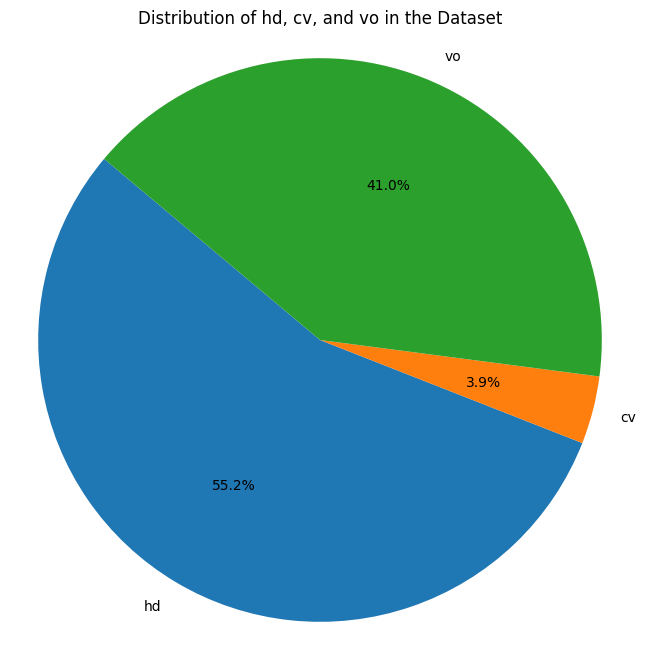

In [11]:
# Distribution of metadata

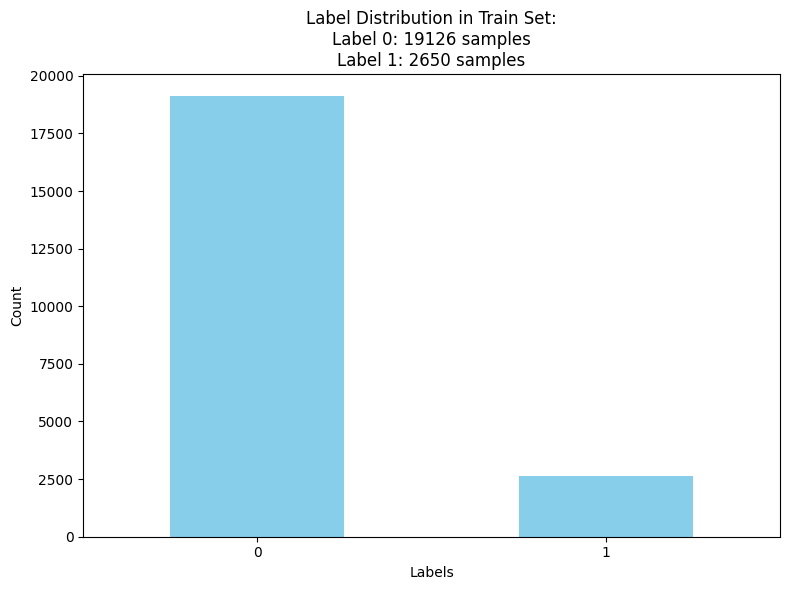

In [17]:
# label wise split in train data

In [22]:
# Sizes of each dataset

Training set size: 13065
Validation set size: 4355
Test set size: 4356


# Finalized Deep Learning Model - BERT with LSTM

Epoch 1/5
1102/1102 [==============================] - 434s 384ms/step - loss: 0.5387 - accuracy: 0.7424 - val_loss: 0.5286 - val_accuracy: 0.7706
Epoch 2/5
1102/1102 [==============================] - 430s 390ms/step - loss: 0.4782 - accuracy: 0.7711 - val_loss: 0.4873 - val_accuracy: 0.7532
Epoch 3/5
1102/1102 [==============================] - 432s 392ms/step - loss: 0.4473 - accuracy: 0.7913 - val_loss: 0.6988 - val_accuracy: 0.6422
Epoch 4/5
1102/1102 [==============================] - 433s 393ms/step - loss: 0.4157 - accuracy: 0.8012 - val_loss: 0.6005 - val_accuracy: 0.7824
Epoch 5/5
1102/1102 [==============================] - 434s 394ms/step - loss: 0.3915 - accuracy: 0.8118 - val_loss: 0.3192 - val_accuracy: 0.8539
138/138 - 6s - loss: 0.3192 - accuracy: 0.8539 - 6s/epoch - 42ms/step

Test accuracy: 0.8539019823074341
138/138 [==============================] - 7s 44ms/step


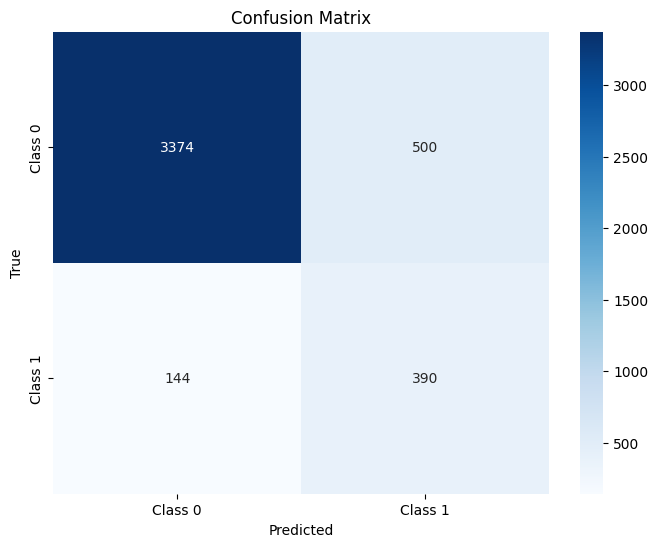

In [8]:
# Confusion Matrix

# Sample Predictions

In [10]:
import tensorflow as tf

# Function to predict the label for a given text
def predict_text(text, tokenizer, bert_model, model, max_length=50):
    # Step 1: Encode the text using the BERT tokenizer
    encodings = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )

    # Step 2: Get BERT embeddings for the encoded text
    bert_outputs = bert_model(encodings['input_ids'], attention_mask=encodings['attention_mask'])
    embeddings = bert_outputs.last_hidden_state

    # Pool the outputs: we take the mean of all tokens' embeddings (timesteps)
    pooled_embeddings = tf.reduce_mean(embeddings, axis=1)

    # Reshape pooled embeddings to match LSTM input requirements (batch_size, timesteps, features)
    pooled_embeddings = tf.expand_dims(pooled_embeddings, axis=1)

    # Step 3: Use the trained model to predict the class of the text
    prediction = model.predict(pooled_embeddings)
    predicted_class = (prediction > 0.5).astype("int32")

    return predicted_class

# Example texts to check
example_texts = [
    "Imagine how many famous people may not have existed if abortions had always been so available. ",
    "I hope she gets sodomised by a gang of Somali Street shitters. ",
    "MGTOW is the premise that men should demand unconditional surrender from women, not negotiate with them  "
]

# Predicting the class for each example text
for text in example_texts:
    predicted_class = predict_text([text], tokenizer, bert_model, model)
    if predicted_class == 1:
        print(f"The text: \"{text}\" is hateful.")
    else:
        print(f"The text: \"{text}\" is not hateful.")

1/1 [==============================] - 2s 2s/step
The text: "Imagine how many famous people may not have existed if abortions had always been so available. " is not hateful.
1/1 [==============================] - 0s 84ms/step
The text: "I hope she gets sodomised by a gang of Somali Street shitters. " is hateful.
1/1 [==============================] - 0s 47ms/step
The text: "MGTOW is the premise that men should demand unconditional surrender from women, not negotiate with them  " is hateful.
